<a href="https://colab.research.google.com/github/Edu-Moreira/Estudos-de-Python/blob/main/Simula%C3%A7%C3%A3o_Carteiras_Base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install python-bcb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 75.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires 

In [2]:
!pip install yfinance

In [3]:
!pip install plotly

In [4]:

!pip install PyPortfolioOpt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.6 MB/s eta 0:00:00


# Simulação Carteira Base

In [5]:
import pandas as pd
import numpy as np
import	yfinance as yf
import plotly.express as px
import plotly.graph_objects as go


from plotly.subplots import make_subplots
from bcb import sgs
from datetime import date
from datetime import datetime

In [6]:
#import riskfolio as rp
import pypfopt as pf

## Coleta de Dados

### CDI

In [7]:
cdi = sgs.get(('CDI', 12))

cdi = cdi / 100 # os dados são fornecidos em %, essa divisão visa normalizar os valores

cdi

,CDI
Date,
1986-03-06,0.000681
1986-03-10,0.000690
1986-03-12,0.000674
1986-03-14,0.000646
1986-03-17,0.000682
...,...
2023-06-22,0.000508
2023-06-23,0.000508
2023-06-26,0.000508


In [8]:
### CDI Acumulado com corte na data especifica

start1 = '2007-01-01'

start2 = '2013-01-01'

start3 = '2017-01-01'

start4 = '2020-01-01'

cdi1 = cdi.loc[start1:]

cdi1['CDI Acumulado'] = (cdi1.CDI+1).cumprod()

cdi2 = cdi.loc[start2:]

cdi2['CDI Acumulado'] = (cdi2.CDI+1).cumprod()

cdi3 = cdi.loc[start3:]

cdi3['CDI Acumulado'] = (cdi3.CDI+1).cumprod()

cdi4 = cdi.loc[start4:]

cdi4['CDI Acumulado'] = (cdi4.CDI+1).cumprod()


<ipython-input-8-be0a61c1a836>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdi1['CDI Acumulado'] = (cdi1.CDI+1).cumprod()
<ipython-input-8-be0a61c1a836>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdi2['CDI Acumulado'] = (cdi2.CDI+1).cumprod()
<ipython-input-8-be0a61c1a836>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

### IBOV

In [9]:
ibov = pd.DataFrame(yf.download('^BVSP',start1)['Adj Close'])

ibov1 = ibov.loc[start1:]

ibov1['Ibov Acumulado'] = (ibov1.pct_change()+1).cumprod()

ibov2 = ibov.loc[start2:]

ibov2['Ibov Acumulado'] = (ibov2.pct_change()+1).cumprod()

ibov3 = ibov.loc[start3:]

ibov3['Ibov Acumulado'] = (ibov3.pct_change()+1).cumprod()

ibov4 = ibov.loc[start4:]

ibov4['Ibov Acumulado'] = (ibov4.pct_change()+1).cumprod()

[*********************100%***********************]  1 of 1 completed


<ipython-input-9-31680207ae40>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ibov1['Ibov Acumulado'] = (ibov1.pct_change()+1).cumprod()
<ipython-input-9-31680207ae40>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ibov2['Ibov Acumulado'] = (ibov2.pct_change()+1).cumprod()
<ipython-input-9-31680207ae40>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [10]:
ivvb = pd.DataFrame(yf.download('IVVB11.SA',start1)['Adj Close'])

ivvb1 = ivvb.loc[start1:]

ivvb1['IVVB Acumulado'] = (ivvb1.pct_change()+1).cumprod()

ivvb2 = ivvb.loc[start2:]

ivvb2['IVVB Acumulado'] = (ivvb2.pct_change()+1).cumprod()

ivvb3 = ivvb.loc[start3:]

ivvb3['IVVB Acumulado'] = (ivvb3.pct_change()+1).cumprod()

ivvb4 = ivvb.loc[start4:]

ivvb4['IVVB Acumulado'] = (ivvb4.pct_change()+1).cumprod()

[*********************100%***********************]  1 of 1 completed


<ipython-input-10-a2efc03529f4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ivvb1['IVVB Acumulado'] = (ivvb1.pct_change()+1).cumprod()
<ipython-input-10-a2efc03529f4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ivvb2['IVVB Acumulado'] = (ivvb2.pct_change()+1).cumprod()
<ipython-input-10-a2efc03529f4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [11]:
fig = make_subplots(rows=2, cols=2, subplot_titles=("CDI",'IBOV', "IVVB", "..."))

fig.add_trace(go.Scatter(x=cdi2.index, y = cdi2['CDI Acumulado'], mode='lines',showlegend= False, line_color = 'red') ,row=1 , col=1)
fig.add_trace(go.Scatter(x=ibov2.index, y = ibov2['Ibov Acumulado'], mode='lines', showlegend= False, line_color = 'blue'),row=1 , col=2)
fig.add_trace(go.Scatter(x=ivvb2.index, y = ivvb2['IVVB Acumulado'], mode='lines', showlegend= False, line_color = 'orange'),row=2 , col=1)

fig.add_trace(go.Scatter(x=cdi2.index, y = cdi2['CDI Acumulado'], mode='lines', showlegend= False, line_color = 'red'),row=2 , col=2)
fig.add_trace(go.Scatter(x=ibov2.index, y = ibov2['Ibov Acumulado'], mode='lines', showlegend= False, line_color = 'blue'),row=2 , col=2)
fig.add_trace(go.Scatter(x=ivvb2.index, y = ivvb2['IVVB Acumulado'], mode='lines', showlegend= False, line_color = 'orange'),row=2 , col=2)

fig.update_layout(height = 1200 , width = 1600)

fig.show()

## Montando a Carteira

In [12]:
ativos1 = pd.DataFrame()

ativos1['ibov'] = ibov1['Ibov Acumulado']

ativos1['cdi'] = cdi1['CDI Acumulado']

ativos1['ivvb'] = ivvb1['IVVB Acumulado']

#ativos1 = ativos1.dropna()



In [13]:
ativos2 = pd.DataFrame()

ativos2['ibov'] = ibov2['Ibov Acumulado']

ativos2['cdi'] = cdi2['CDI Acumulado']

ativos2['ivvb'] = ivvb2['IVVB Acumulado']

#ativos2 = ativos2.dropna()



In [14]:
ativos3 = pd.DataFrame()

ativos3['ibov'] = ibov3['Ibov Acumulado']

ativos3['cdi'] = cdi3['CDI Acumulado']

ativos3['ivvb'] = ivvb3['IVVB Acumulado']

#ativos3 = ativos3.dropna()



In [15]:
ativos4 = pd.DataFrame()

ativos4['ibov'] = ibov4['Ibov Acumulado']

ativos4['cdi'] = cdi4['CDI Acumulado']

ativos4['ivvb'] = ivvb4['IVVB Acumulado']

#ativos4 = ativos4.dropna()



In [32]:
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

mu = expected_returns.mean_historical_return(ativos2)
S = risk_models.sample_cov(ativos2)

In [33]:
mu

ibov        0.062407
cdi         0.091152
ivvb        0.210125
carteira    0.127457
Ano         0.000481
dtype: float64

In [34]:
# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
raw_weights = ef.efficient_return(0.14)
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('ibov', 0.0), ('cdi', 0.58942), ('ivvb', 0.41058), ('carteira', 0.0), ('Ano', 0.0)])
Expected annual return: 14.0%
Annual volatility: 8.7%
Sharpe Ratio: 1.38


(0.13999999999999999, 0.0868721097887243, 1.3813409193335324)

In [19]:
## Ponderação Renda Fixa vs Renda Variável

rf = 0.76
rv = 1-rf

ativos1['carteira'] = ativos1['cdi']* rf + ativos1['ibov'] * 0  + ativos1['ivvb']* (rv)

ativos2['carteira'] = ativos2['cdi']* rf + ativos2['ibov'] * (0)  + ativos2['ivvb']* (rv)

ativos3['carteira'] = ativos3['cdi']* rf + ativos3['ibov'] * (0)  + ativos3['ivvb']* (rv)

ativos4['carteira'] = ativos4['cdi']* rf + ativos4['ibov'] * (0) + ativos4['ivvb']* (rv)


In [20]:
fig = make_subplots(rows=2, cols=2, subplot_titles=("Investimento feito em Jun de 2007", "Investimento feito em Jun de 2013", "Investimento feito em Jun de 2017", "Investimento feito em Jun de 2020"))

fig.add_trace(go.Scatter(x=ativos1.index, y = ativos1['cdi'], mode='lines',name = 'cdi', line_color = 'red') ,row=1 , col=1)
fig.add_trace(go.Scatter(x=ativos2.index, y = ativos2['cdi'], mode='lines', showlegend= False, line_color = 'red'),row=1 , col=2)
fig.add_trace(go.Scatter(x=ativos3.index, y = ativos3['cdi'], mode='lines', showlegend= False, line_color = 'red'),row=2 , col=1)
fig.add_trace(go.Scatter(x=ativos4.index, y = ativos4['cdi'], mode='lines', showlegend= False, line_color = 'red'),row=2 , col=2)


fig.add_trace(go.Scatter(x=ativos1.index, y = ativos1['carteira'], mode='lines', name = 'carteira ', line_color = 'blue'),row=1 , col=1)
fig.add_trace(go.Scatter(x=ativos2.index, y = ativos2['carteira'], mode='lines', showlegend= False, line_color = 'blue'),row=1 , col=2)
fig.add_trace(go.Scatter(x=ativos3.index, y = ativos3['carteira'], mode='lines', showlegend= False, line_color = 'blue'),row=2 , col=1)
fig.add_trace(go.Scatter(x=ativos4.index, y = ativos4['carteira'], mode='lines', showlegend= False, line_color = 'blue'),row=2 , col=2)


fig.add_trace(go.Scatter(x=ativos1.index, y = ativos1['ibov'], mode='lines', name = 'ibov', line_color = 'green'),row=1 , col=1)
fig.add_trace(go.Scatter(x=ativos2.index, y = ativos2['ibov'], mode='lines', showlegend= False, line_color = 'green'),row=1 , col=2)
fig.add_trace(go.Scatter(x=ativos3.index, y = ativos3['ibov'], mode='lines', showlegend= False, line_color = 'green'),row=2 , col=1)
fig.add_trace(go.Scatter(x=ativos4.index, y = ativos4['ibov'], mode='lines', showlegend= False, line_color = 'green'),row=2 , col=2)

fig.add_trace(go.Scatter(x=ativos1.index, y = ativos1['ivvb'], mode='lines', name = 'ivvb', line_color = 'orange'),row=1 , col=1)
fig.add_trace(go.Scatter(x=ativos2.index, y = ativos2['ivvb'], mode='lines', showlegend= False, line_color = 'orange'),row=1 , col=2)
fig.add_trace(go.Scatter(x=ativos3.index, y = ativos3['ivvb'], mode='lines', showlegend= False, line_color = 'orange'),row=2 , col=1)
fig.add_trace(go.Scatter(x=ativos4.index, y = ativos4['ivvb'], mode='lines', showlegend= False, line_color = 'orange'),row=2 , col=2)

fig.add_trace(go.Scatter(x=ativos1.index, y=[1] * len(ativos1), mode='lines', line=dict(dash='dash'), name='Zero',line_color = 'grey'),row=1 , col=1)
fig.add_trace(go.Scatter(x=ativos2.index, y=[1] * len(ativos2), mode='lines', line=dict(dash='dash'), showlegend= False,line_color = 'grey'),row=1 , col=2)
fig.add_trace(go.Scatter(x=ativos3.index, y=[1] * len(ativos3), mode='lines', line=dict(dash='dash'), showlegend= False,line_color = 'grey'),row=2 , col=1)
fig.add_trace(go.Scatter(x=ativos4.index, y=[1] * len(ativos4), mode='lines', line=dict(dash='dash'), showlegend= False,line_color = 'grey'),row=2 , col=2)


fig.update_layout(height = 1200 , width = 1600)

fig.show()

### Tabelas Resumo

In [21]:
ativos2['Ano'] = ativos2.index.year
tab1 = (ativos2.groupby(['Ano']).last()/ativos2.groupby(['Ano']).first())-1
tab2 = ativos2.groupby(['Ano']).std()

In [31]:
tabela = pd.DataFrame()
tabela['Retorno CDI'] = tab1['cdi']*100
tabela['Retorno IBOV'] = tab1['ibov']*100
tabela['Retorno Carteira'] = tab1['carteira']*100
tabela['Volatilidade CDI'] = tab2['cdi']*100
tabela['Volatilidade IBOV'] = tab2['ibov']*100
tabela['Volatilidade Carteira'] = tab2['carteira']*100

tabela = tabela.round(2)

tabela


,Retorno CDI,Retorno IBOV,Retorno Carteira,Volatilidade CDI,Volatilidade IBOV,Volatilidade Carteira
Ano,,,,,,
2013,8.00,-18.65,NaN,2.29,6.39,NaN
2014,10.72,-0.66,12.54,3.36,6.20,4.16
2015,13.13,-10.64,22.75,4.58,5.63,8.29
2016,13.88,42.92,6.79,5.47,11.45,3.78
2017,9.87,28.21,12.36,4.44,7.85,6.08
2018,6.37,12.83,7.85,3.10,7.81,7.93
2019,5.92,27.42,15.37,3.16,9.29,8.36
2020,2.73,0.62,19.33,1.47,21.77,15.21
2021,4.38,-11.59,19.94,2.43,12.14,13.47


### DrawDown

In [23]:
carteira = ativos2.drop(columns='Ano').dropna()
picos = pd.DataFrame()
picos [ 'ibov'] = carteira['ibov'].cummax()
picos [ 'cdi'] = carteira['cdi'].cummax()
picos [ 'ivvb'] = carteira['ivvb'].cummax()
picos [ 'carteira'] = carteira['carteira'].cummax()


In [30]:
drawdown = pd.DataFrame()

drawdown [ 'ibov'] = (carteira['ibov'] - picos['ibov']) / picos['ibov']
drawdown [ 'cdi'] = (carteira['cdi'] - picos['cdi']) / picos['cdi']
drawdown [ 'ivvb'] = (carteira['ivvb'] - picos['ivvb']) / picos['ivvb']
drawdown [ 'carteira'] = (carteira['carteira'] - picos['carteira']) / picos['carteira']

import plotly.express as px

fig = px.area(drawdown['carteira'])
fig.show()

## Otimizando a carteira

### Avaliando Carteira de Ações

In [25]:
melhores_acoes = [ 'PETR4.SA',  'BBDC4.SA', 'B3SA3.SA', 'WEGE3.SA',
        'ITSA4.SA', 'HAPV3.SA',  'VALE3.SA', 'ABEV3.SA',
       'USIM5.SA',  'BBAS3.SA', 'CMIG4.SA',
       'GGBR4.SA', 'JBSS3.SA','XINA11.SA', 'IVVB11.SA']

[*********************100%***********************]  15 of 15 completed


<Axes: >

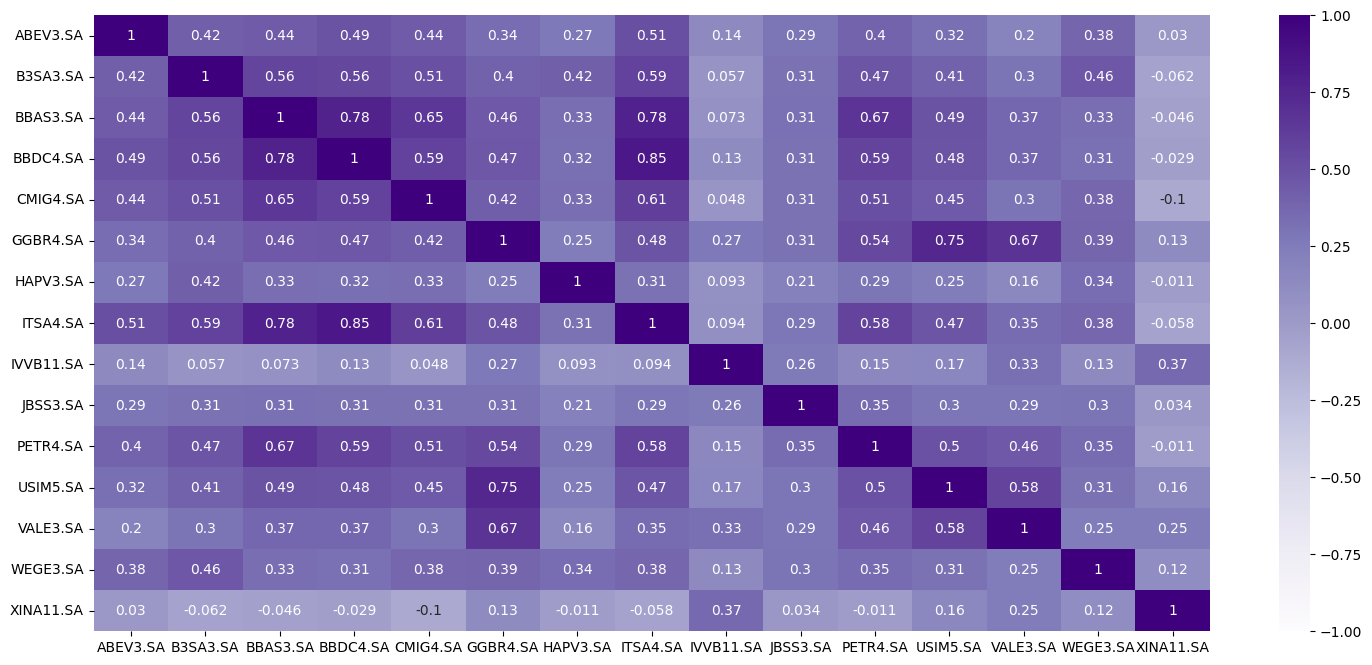

In [26]:
carteira_exemplo = yf.download(melhores_acoes, period= '5y')

carteira_exemplo['Adj Close'].dropna()

carteira_exemplo_corr = carteira_exemplo['Adj Close'].pct_change().corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18,8))

sns.heatmap(carteira_exemplo_corr, vmin=-1,vmax=1, annot= True, cmap= 'Purples')

In [27]:
carteira_exemplo_adj = carteira_exemplo['Adj Close'].dropna()

carteira_exemplo_adj = carteira_exemplo_adj / carteira_exemplo_adj.iloc[0]


px.line(carteira_exemplo_adj)

In [28]:
carteira_exemplo['Adj Close']['VALE3.SA']

from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig= make_subplots(rows = 2 , cols = 1,row_heights= [0.7,0.3])

fig.add_trace(go.Scatter(x = carteira_exemplo['Adj Close']['VALE3.SA'].index, y= carteira_exemplo['Adj Close']['VALE3.SA'], mode= 'lines', name= 'Vale', line_color = 'orange'),row = 1, col=1)

fig.add_trace(go.Scatter(x = carteira_exemplo['Volume']['VALE3.SA'].index, y= carteira_exemplo['Volume']['VALE3.SA'], mode= 'lines', showlegend= False, line_color = 'orange'),row = 2, col=1)

fig.update_layout(title_text = 'Vale3 cotação e volume', title_font_family = "Droid Sans" ,title_x = 0.5)
fig.show()


In [29]:
#a = carteira_exemplo['Adj Close'].pct_change().dropna()

mu2 = expected_returns.mean_historical_return(a)
S2 = risk_models.sample_cov(a)

NameError: ignored

In [ ]:
a = carteira_exemplo['Adj Close']


In [ ]:
a.dropna(inplace=True)

In [ ]:
# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu2, S2)
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)